In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom


In [10]:
np.zeros((2,3))
np.ones((2,3))
np.eye((2))
np.empty((2,3))
np.full((2,3),7)

array([[7, 7, 7],
       [7, 7, 7]])

In [11]:
index = ['A','B','C']
value = [1,2,3]
myser = pd.Series(index=index, data=value)
myser

A    1
B    2
C    3
dtype: int64

In [43]:

mycols = ['I','II','III','IV']
mydata = np.random.randint(50,101,(20,4))
df= pd.DataFrame(data=mydata, columns=mycols)
df

,I,II,III,IV
0,60,75,92,86
1,57,68,63,56
2,67,72,88,81
3,81,90,51,64
4,58,91,61,67
5,83,89,84,61
6,60,62,59,63
7,55,59,63,73
8,86,83,99,57
9,81,89,92,73


In [50]:
df.iloc[:10, 2:]

,III,IV
0,92,86
1,63,56
2,88,81
3,51,64
4,61,67
5,84,61
6,59,63
7,63,73
8,99,57
9,92,73


In [25]:
df.iloc[2]

I      92
II     50
III    78
IV     97
Name: Sci, dtype: int32

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Eng to Social
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   I       4 non-null      int32
 1   II      4 non-null      int32
 2   III     4 non-null      int32
 3   IV      4 non-null      int32
dtypes: int32(4)
memory usage: 96.0+ bytes


In [28]:
df[df['I']>70]

,I,II,III,IV
Eng,79,89,71,89
Sci,92,50,78,97
Social,72,93,96,80


In [29]:
tips_df = pd.read_csv("./data_pd/tips.csv")
tips_df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251


In [30]:
len(tips_df)

244

In [33]:
Suns = ['Sun']
len(tips_df[tips_df['day'].isin(Suns)])

76

In [34]:
tips_df.sort_values('tip', ascending=False).head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5.473850e+15,Sat1954
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,6.762190e+11,Sat4590
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3.542580e+15,Sat239
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6.596450e+15,Sat8139
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3.526520e+15,Thur1025


In [36]:
tips_df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [41]:
tips_df.iloc[tips_df['total_bill'].idxmax()]

total_bill                       50.81
tip                               10.0
gender                            Male
smoker                             Yes
day                                Sat
time                            Dinner
size                                 3
price_per_person                 16.94
Payer Name               Gregory Clark
CC Number           5473850000000000.0
Payment ID                     Sat1954
Name: 170, dtype: object

In [51]:
tips_df.value_counts('gender')

gender
Male      157
Female     87
Name: count, dtype: int64

In [55]:
tips_df['size'].nunique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [58]:
tips_df['gender_mapped'] = tips_df['gender'].map({'Female':'F', 'Male': 'M'})
tips_df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,gender_mapped
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959,F
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608,M
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458,M
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260,M
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251,F


In [63]:
tips_df.nsmallest(5,'tip')

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,gender_mapped
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4.359490e+15,Sat3455,F
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3.508910e+15,Fri3780,F
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3.559220e+15,Sat4801,F
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3.543680e+15,Sat5032,M
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959,F


In [80]:
# tips_df['total_bill'].mean()            #19.78594262295082
grouped_df = tips_df.groupby(['gender_mapped','day'])
grouped_df
mean_tip_gender = grouped_df['price_per_person'].mean()
mean_tip_gender

gender_mapped  day 
F              Fri     6.778889
               Sat     8.723214
               Sun     6.774444
               Thur    6.943750
M              Fri     9.352000
               Sat     7.932203
               Sun     8.201724
               Thur    7.936667
Name: price_per_person, dtype: float64

In [81]:
(18.056897 + 20.744076)/2

19.4004865

In [82]:
grouped_df = grouped_df.agg({'tip': ['mean','sum','count']})
grouped_df

tip              
                        mean     sum count
gender_mapped day                         
F             Fri   2.781111   25.03     9
              Sat   2.801786   78.45    28
              Sun   3.367222   60.61    18
              Thur  2.575625   82.42    32
M             Fri   2.693000   26.93    10
              Sat   3.083898  181.95    59
              Sun   3.220345  186.78    58
              Thur  2.980333   89.41    30

In [83]:
heart_df = pd.read_csv('./data_pd/heart.csv')
heart_df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [94]:
age_soted = heart_df.sort_values('age')
age_soted

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


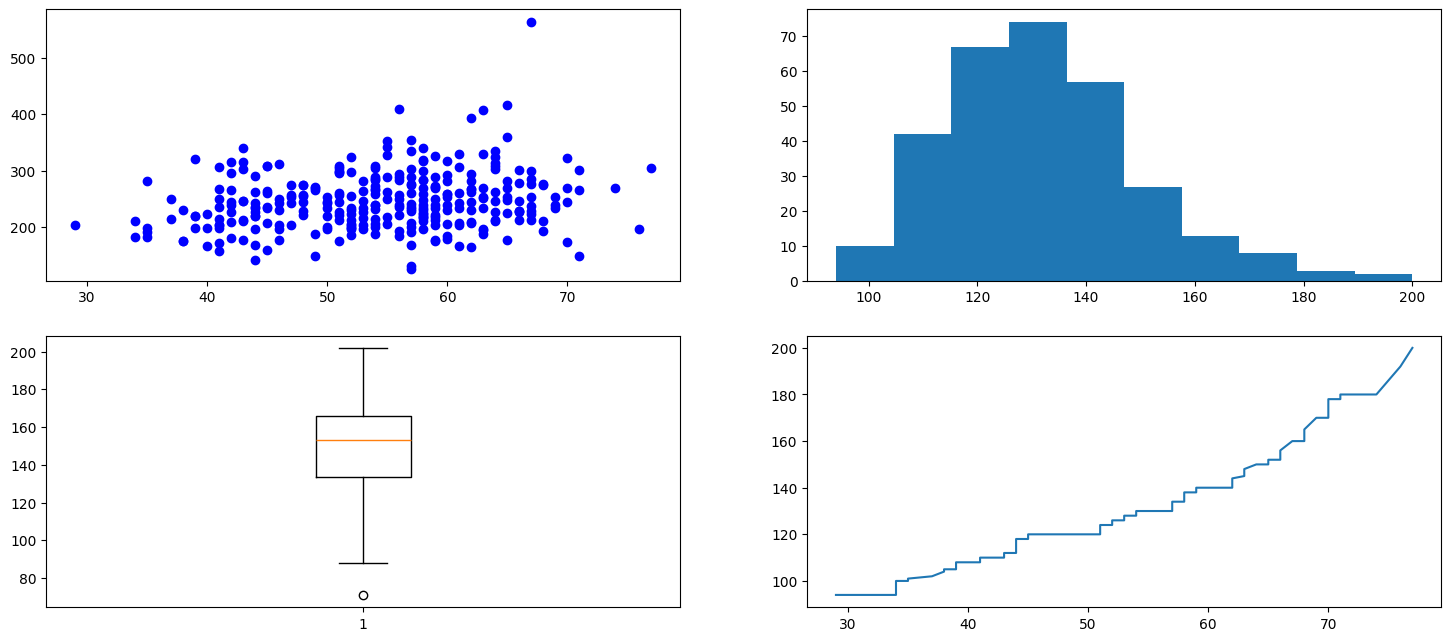

In [96]:
plt.figure(figsize=(18,12))
plt.subplot(3,2,1)
plt.scatter(data=heart_df, x='age', y='chol', color='blue')
plt.subplot(3,2,2)
plt.hist(data=heart_df, x='trestbps', bins=10)
plt.subplot(3,2,3)
plt.boxplot(data=heart_df, x='thalach')
plt.subplot(3,2,4)
age_soted = heart_df.sort_values('age')
bp_soted = heart_df.sort_values('trestbps')
plt.plot(age_soted['age'], bp_soted['trestbps'])

<Axes: xlabel='trestbps', ylabel='Count'>

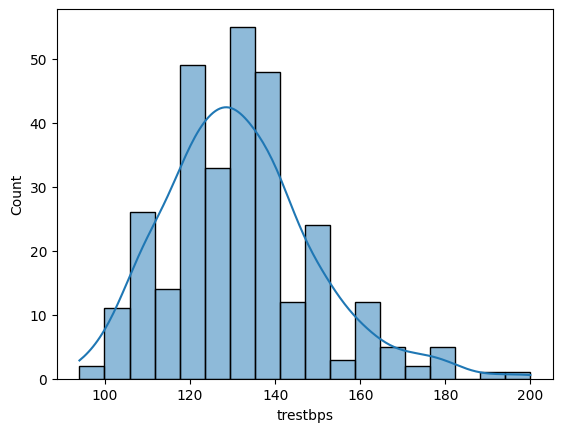

In [98]:
sns.histplot(data=heart_df, x='trestbps', kde=True)

<Axes: >

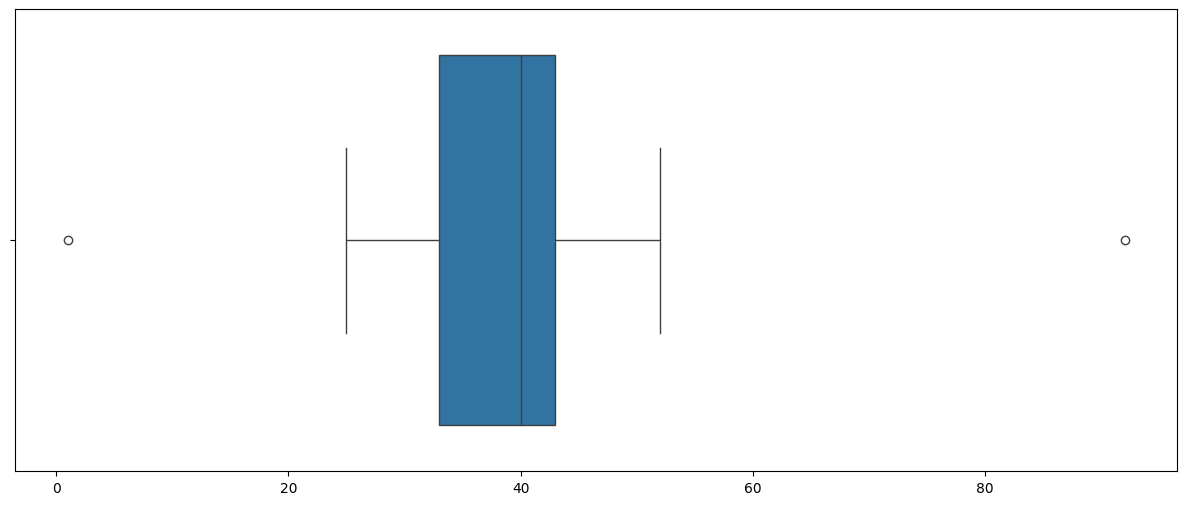

In [101]:
marks = [25,52,45,33,41,42,43,40,30,34,37,1,92]
plt.figure(figsize=(15,6))

sns.boxplot(data=marks, orient='h')

<Axes: xlabel='chol'>

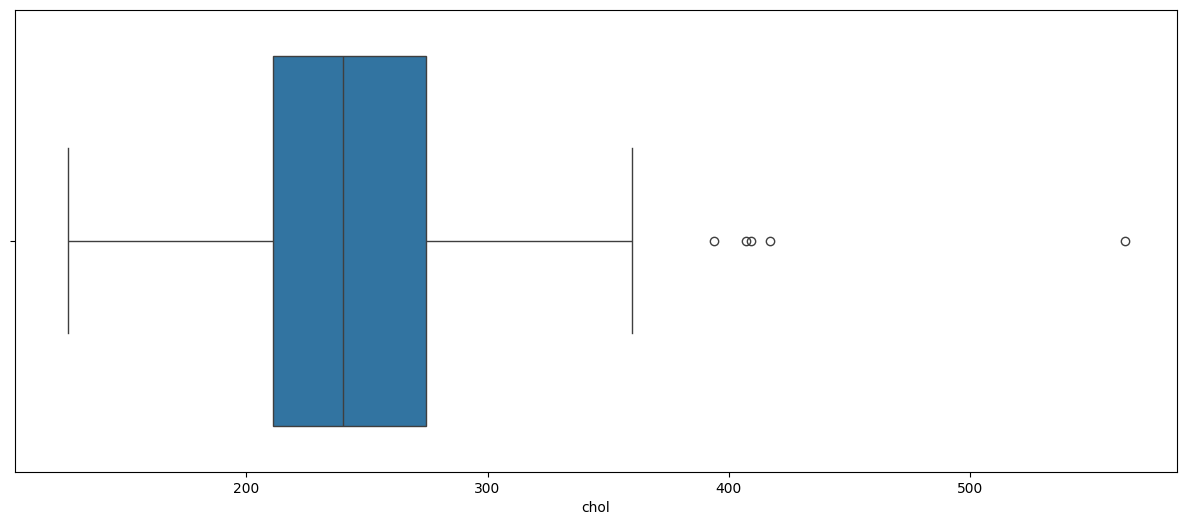

In [105]:
plt.figure(figsize=(15,6))

sns.boxplot(data=heart_df['chol'] ,orient='h')

In [123]:
heart_df['chol'].mean()     #246.26402640264027
n = len(heart_df['chol'])       # 303
q1 = .25*(n+1)
q3 = .75*(n+1)
ls = heart_df.sort_values(by='chol', ascending=True)['chol'].to_list()
Q1 = ls[int(q1) - 1]
Q3 = ls[int(q3) - 1]

IQR = Q3 - Q1

lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

outliers  = [x for x in ls if x<lower_bound or x>upper_bound]

In [124]:
outliers

[394, 407, 409, 417, 564]

In [139]:
data_zero_skew = np.random.normal(loc=0, scale=1, size = 1000)
data_right_skew = np.random.exponential(scale=1, size = 1000)
data_left_skew = -np.random.exponential(scale=1, size = 1000)

In [140]:
mean_zero = data_zero_skew.mean()               # -0.020964933383297905
mean_left = data_left_skew.mean()               # -0.06338324386174861
mean_right = data_right_skew.mean()              # -0.017901808556249586

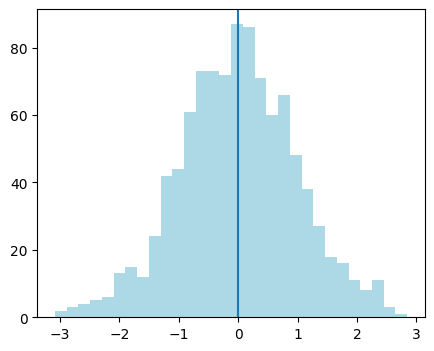

In [141]:
plt.figure(figsize=(5,4))
plt.hist(data_zero_skew, bins=30, color='lightblue')
plt.axvline(mean_zero)

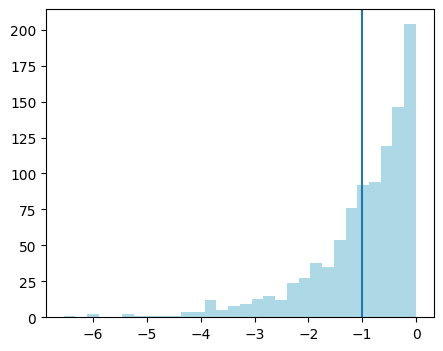

In [142]:
plt.figure(figsize=(5,4))
plt.hist(data_left_skew, bins=30, color='lightblue')
plt.axvline(mean_left)

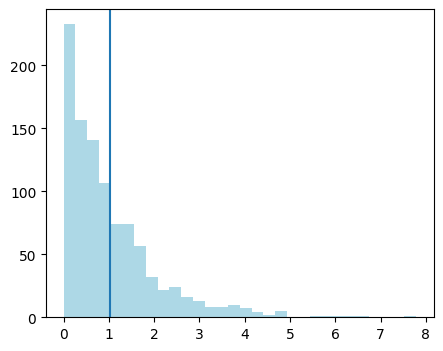

In [143]:
plt.figure(figsize=(5,4))
plt.hist(data_right_skew, bins=30, color='lightblue')
plt.axvline(mean_right)

In [146]:
df= pd.read_csv('./data_pd/weight-height.csv')
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [147]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']


In [151]:
overall_corr = df[['Height', 'Weight']].corr()
male_corr = male_df[['Height', 'Weight']].corr()
female_corr = female_df[['Height', 'Weight']].corr()

In [153]:
print(overall_corr)
print("="*60)
print(male_corr)
print("="*60)
print(female_corr)


          Height    Weight
Height  1.000000  0.924756
Weight  0.924756  1.000000
          Height    Weight
Height  1.000000  0.862979
Weight  0.862979  1.000000
          Height    Weight
Height  1.000000  0.849609
Weight  0.849609  1.000000


In [154]:
overall_cov = df[['Height', 'Weight']].cov()
male_cov = male_df[['Height', 'Weight']].cov()
female_cov = female_df[['Height', 'Weight']].cov()

In [155]:
print(overall_cov)
print("="*60)
print(male_cov)
print("="*60)
print(female_cov)

            Height       Weight
Height   14.803473   114.242656
Weight  114.242656  1030.951855
           Height      Weight
Height   8.198843   48.879649
Weight  48.879649  391.294074
           Height      Weight
Height   7.269947   43.576404
Weight  43.576404  361.854281


In [161]:
df_2015 = pd.read_csv('./data_pd/marathon_results_2015.csv')
df_2015.head()


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [158]:
# df_2015['hours','minutes','seconds'] = df_2015['Pace'].str.split(':')
df_2015['Official Time'] = pd.to_datetime(df_2015['Official Time'], errors='coerce')
df_2015.info()

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_8516\761063200.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2015['Official Time'] = pd.to_datetime(df_2015['Official Time'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     26598 non-null  int64         
 1   Bib            26598 non-null  object        
 2   Name           26598 non-null  object        
 3   Age            26598 non-null  int64         
 4   M/F            26598 non-null  object        
 5   City           26598 non-null  object        
 6   State          24047 non-null  object        
 7   Country        26598 non-null  object        
 8   Citizen        1064 non-null   object        
 9   Unnamed: 9     67 non-null     object        
 10  5K             26598 non-null  object        
 11  10K            26598 non-null  object        
 12  15K            26598 non-null  object        
 13  20K            26598 non-null  object        
 14  Half           26598 non-null  object        
 15  25K            2659

In [162]:
df_2015[['hours','minutes','seconds']] = df_2015['Official Time'].str.split(':', expand=True)
df_2015.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,hours,minutes,seconds
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,2:02:39,0:04:56,-,2:09:17,1,1,1,2,09,17
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,2:02:42,0:04:58,-,2:09:48,2,2,2,2,09,48
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,2:03:01,0:04:59,-,2:10:22,3,3,3,2,10,22
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,2:03:47,0:05:00,-,2:10:47,4,4,4,2,10,47
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,2:03:27,0:05:00,-,2:10:49,5,5,5,2,10,49


In [163]:
df_2015['total_time'] = df_2015['hours'].astype(int)*3600 + df_2015['minutes'].astype(int)*60 + df_2015['seconds'].astype(int)
df_2015.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,Pace,Proj Time,Official Time,Overall,Gender,Division,hours,minutes,seconds,total_time
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,0:04:56,-,2:09:17,1,1,1,2,09,17,7757
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,0:04:58,-,2:09:48,2,2,2,2,09,48,7788
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,0:04:59,-,2:10:22,3,3,3,2,10,22,7822
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,0:05:00,-,2:10:47,4,4,4,2,10,47,7847
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,0:05:00,-,2:10:49,5,5,5,2,10,49,7849


In [165]:
df_2015 = df_2015.drop(['hours','minutes','seconds'], axis=True)

In [166]:
df_2015[['hours','minutes','seconds']] = df_2015['Pace'].str.split(':', expand=True)
df_2015['total_pace_time'] = df_2015['hours'].astype(int)*3600 + df_2015['minutes'].astype(int)*60 + df_2015['seconds'].astype(int)
df_2015 = df_2015.drop(['hours','minutes','seconds'], axis=True)
df_2015.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,total_time,total_pace_time
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,7757,296
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,7788,298
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,7822,299
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,7847,300
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,7849,300


In [168]:
coorelation = df_2015[['total_pace_time', 'total_time']].corr()

In [170]:
type(coorelation)

pandas.core.frame.DataFrame

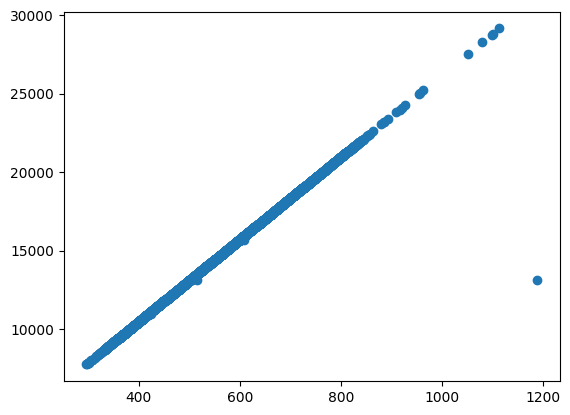

In [172]:
plt.scatter(x=df_2015['total_pace_time'], y=df_2015['total_time'])

In [182]:
num_rolls = 6
prob = np.ones(6)/6
prob

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [175]:
np.ones(6)

array([1., 1., 1., 1., 1., 1.])

In [177]:
cdf = np.cumsum(prob)
cdf

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

<BarContainer object of 6 artists>

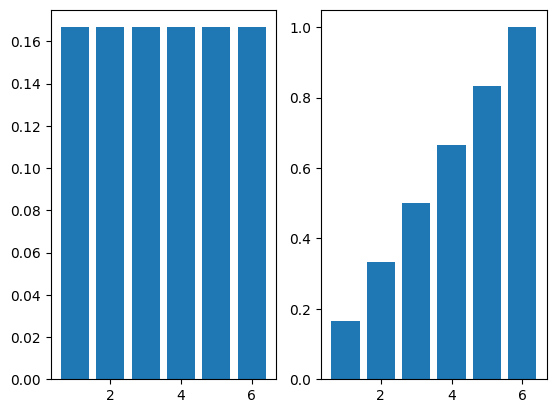

In [185]:
plt.subplot(1,2,1)
plt.bar(range(1,7), prob)
plt.subplot(1,2,2)
plt.bar(range(1,7), cdf)


In [187]:
n = 5
x = 3
p = 0.66

probability = binom.pmf(x,n,p)
probability

0.3323453760000002

In [191]:
p = 0.65
n = 50
x = 0
probability = binom.pmf(x,n,p)
probability
probability = binom.cdf(40,n,p)
probability

0.9933020765440885

In [192]:
n = 6
x = 4
p = 0.25
probability = binom.pmf(x,n,p)

In [193]:
probability

0.03295898437499997

In [194]:
tips_df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,gender_mapped
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959,F
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608,M
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458,M
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260,M
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251,F


In [195]:
def classify_tip(row):
    total_bill = row['total_bill']
    tip = row['tip']
    if tip/total_bill > 0.15:
        return 1 
    else:
        return 0

In [196]:
tips_df['binary_tip'] = tips_df.apply(classify_tip, axis=1)
tips_df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,gender_mapped,binary_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959,F,0
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608,M,1
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458,M,1
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260,M,0
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251,F,0


In [197]:
len(tips_df)

244

In [199]:
tips_df['binary_tip'].sum()
135/244

0.5532786885245902

In [200]:
probability = binom.pmf(135,244,0.5532786885245902)
probability

0.051318394301130124

In [202]:
x = np.arange(1,245)
pmf_val = binom.pmf(x,244,0.5532786885245902)
cdf_val = binom.cdf(x, 244, 0.5532786885245902)

<BarContainer object of 244 artists>

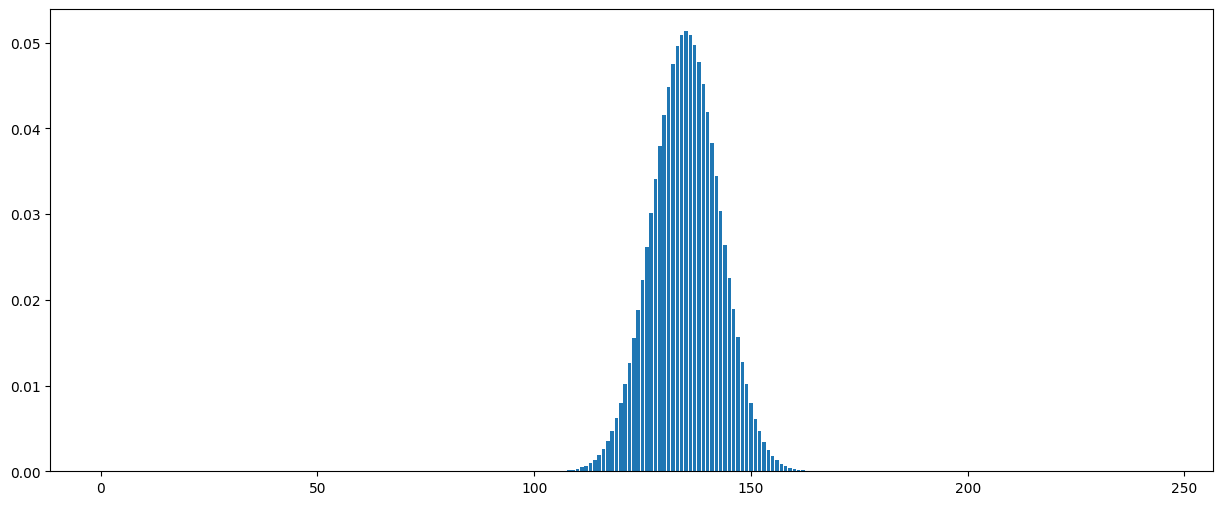

In [204]:
plt.figure(figsize=(15,6))
plt.bar(x, pmf_val)

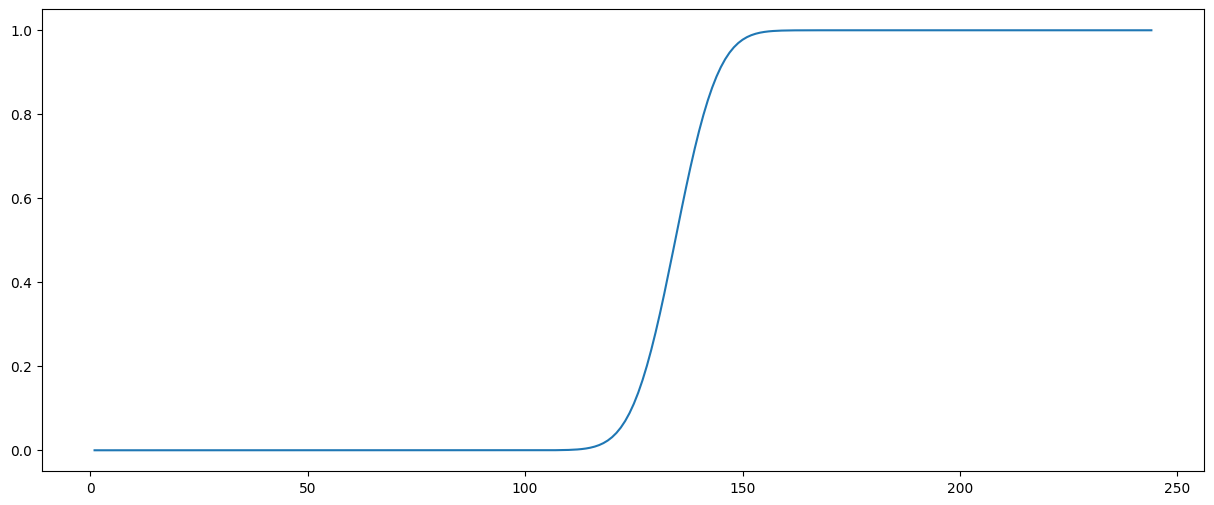

In [206]:
plt.figure(figsize=(15,6))
plt.plot(x, cdf_val)

In [214]:
sorted_tips = tips_df['tip'].sort_values()
tips_df['tip']



0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [210]:
sorted_tips

67      1.00
236     1.00
92      1.00
111     1.00
0       1.01
       ...  
141     6.70
59      6.73
23      7.58
212     9.00
170    10.00
Name: tip, Length: 244, dtype: float64

In [215]:
sorted_tips.mean()

2.99827868852459